In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import requests as rq

In [5]:
dus18 = pd.read_csv('DUS2018.csv')
dus18 = dus18[['lytis', 'amzius','issilavinimas', 'bdu_spalio']]
dus18.head(3)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500


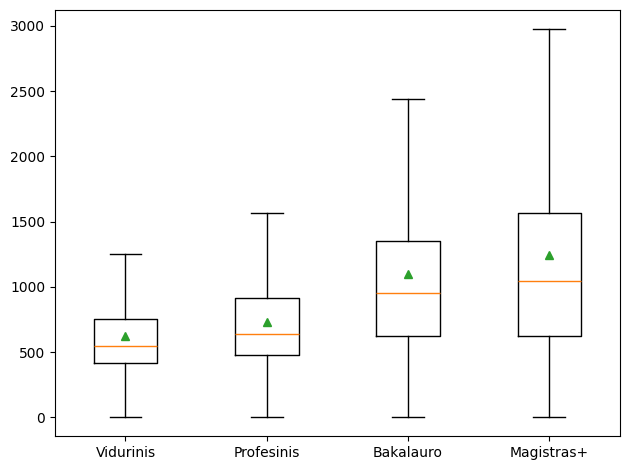

In [6]:
# boxplot()
atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values

atl = [atl_g1,atl_g2,atl_g3,atl_g4]
edus = ['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistras+']

fig, axis = plt.subplots()
#plotting code:

axis.boxplot(atl, showmeans=True, showfliers=False)


axis.set_xticklabels(edus)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

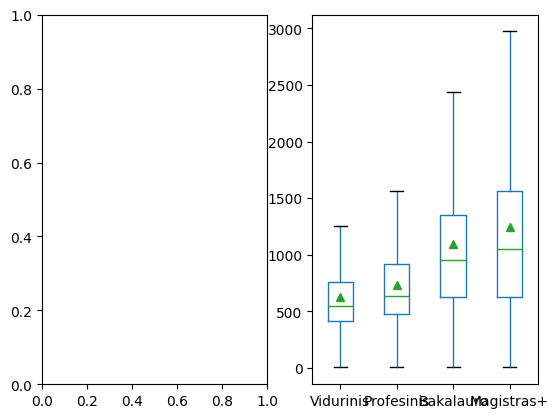

In [7]:
# II boxplot()

fig, (left,right) = plt.subplots(1,2)

axis = dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showfliers=False, showmeans=True)

axis.grid(visible=False)
axis.set_xticklabels(edus)

plt.show()

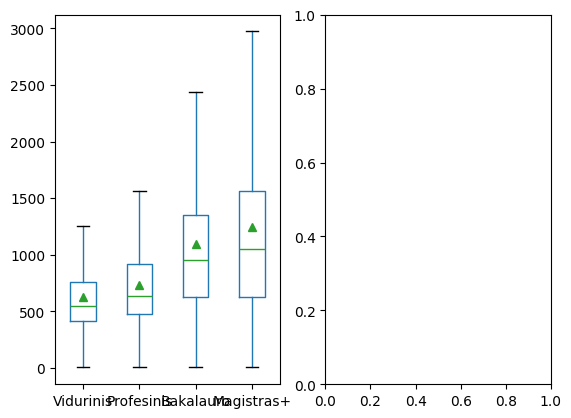

In [8]:
# II boxplot()

fig, (left,right) = plt.subplots(1,2)

dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showfliers=False, showmeans=True, ax=left)

left.grid(visible=False)
left.set_xticklabels(edus)

plt.show()

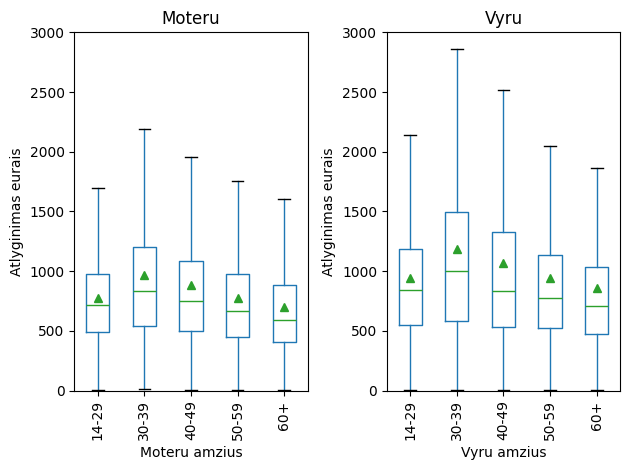

In [60]:
# sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, 
# pagal amžiaus grupes. su subplots() sukurkite 2 grafikus, 
# kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. 
# Prisiminkite ir sudėkite ašių pavadinimus
amz = ['14-29', '30-39', '40-49','50-59', '60+']
fig, (left,right) = plt.subplots(1,2)

dus18.query('lytis == "F"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showfliers=False, showmeans=True, ax=left)
dus18.query('lytis == "M"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showfliers=False, showmeans=True, ax=right)

left.grid(visible=False)
left.set_xticklabels(amz,rotation=90)
right.grid(visible=False)
right.set_xticklabels(amz, rotation=90)

left.set_ylabel('Atlyginimas eurais')
right.set_ylabel('Atlyginimas eurais')
left.set_xlabel('Moteru amzius')
right.set_xlabel('Vyru amzius')
left.set_title('Moteru')
right.set_title('Vyru')

left.set_ylim(0,3000)
right.set_ylim(0,3000)

fig.tight_layout()

plt.show()


In [58]:
ages = dus18['amzius'].value_counts().sort_index(ascending=True).index

In [64]:
dus18.head(2)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487


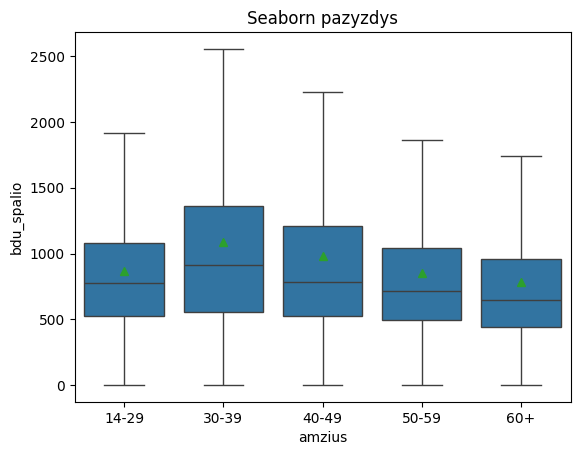

In [73]:
ax = sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y='bdu_spalio',showfliers=False, showmeans=True)
ax.set_title('Seaborn pazyzdys')
plt.show()

<Axes: xlabel='gamintojas', ylabel='kaina'>

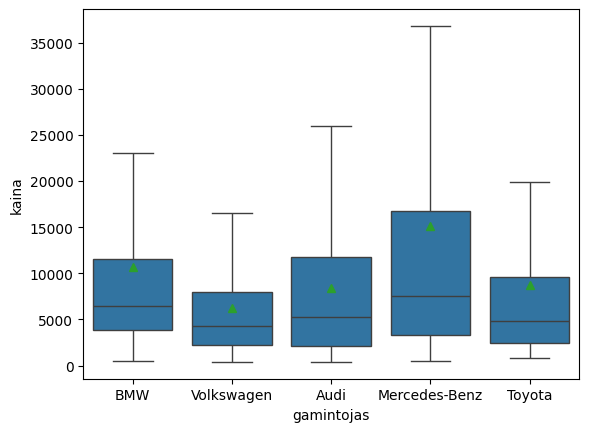

In [74]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.
auto = pd.read_csv('auto.csv', sep="|")[['price', 'gamintojas']]
auto['kaina'] = auto['price'].apply(lambda x: float(x.replace(' ', ''))) # paverciam kainas
auto_atrinkta = auto.merge(auto.value_counts('gamintojas').head(), left_on = 'gamintojas', right_on = 'gamintojas', how = 'right') # sumerginam
sns.boxplot(data=auto_atrinkta, x = 'gamintojas', y = 'kaina', showfliers = False, showmeans = True) #braizom

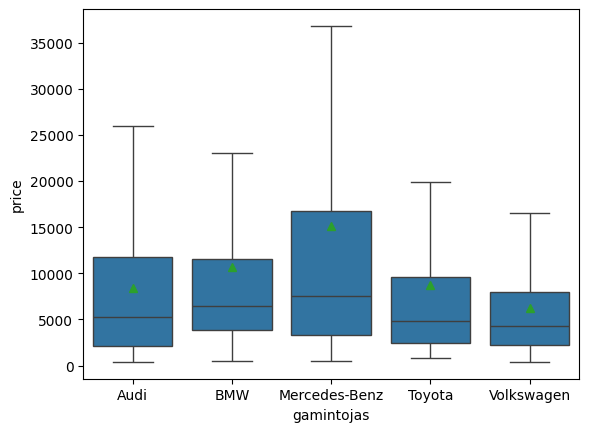

In [76]:
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [77]:
# .dt
# .str


auto.head()

,gamintojas,price,modelis,rida
0,BMW,19500.0,M5,253 000 km
1,Mitsubishi,2700.0,Outlander,195 405 km
2,Seat,13490.0,Arona,129 800 km
3,Skoda,14650.0,Octavia Scout,183 000 km
4,Volvo,38000.0,XC90,127 896 km


In [82]:
auto['G'] = auto['gamintojas'].str.upper().str[:3]

auto.head()

,gamintojas,price,modelis,rida,G
0,BMW,19500.0,M5,253 000 km,BMW
1,Mitsubishi,2700.0,Outlander,195 405 km,MIT
2,Seat,13490.0,Arona,129 800 km,SEA
3,Skoda,14650.0,Octavia Scout,183 000 km,SKO
4,Volvo,38000.0,XC90,127 896 km,VOL


In [4]:
url = 'https://api.meteo.lt/v1/stations'


response = rq.get(url)
stations = response.json()
print(stations)

[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21.00736}}, {'code'

In [5]:
stotys = []
for e in stations:
  stotys.append(e['code'])
  
print(stotys)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [6]:
stotys = []         
for e in stations:
    stotys.append(e['code'])
print(stotys)

visosTemp = []
for stotis in stotys:
    url = f'https://api.meteo.lt/v1/stations/{stotis}/observations/2024-04-18'
    response = rq.get(url)
    temp = response.json()
    sar = temp["observations"][0]["airTemperature"]
    visosTemp.append(sar)
print(visosTemp)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']
[1.9, 4.7, 0.5, 4.6, 3.6, 3.8, 3, 4.3, 4.6, 3.5, 1.2, 2.8, 4, 3.3, 2.5, 0.6, 1.6, 3.5]


In [7]:
#rasti 3 meteo stotis, kuriose fiksuota temperatūra 00:00 laiku buvo didžiausia:
# surinkti į sąrašą fiksuotas temperatūras šiandien, 00:00:00 laiku
df = pd.DataFrame() # sukuriamas tuscias data frame
df['stotis'] = stotys
df['temperatura'] = visosTemp
df.sort_values(by='temperatura', ascending=False).head(3)

,stotis,temperatura
1,dotnuvos-ams,4.7
8,nidos-ams,4.6
3,kauno-ams,4.6
